## Capstone project
* Goals
  * Data extraction
      * Download a publicly available dataset. 
      * Describe the dataset 
      * Describe what question you intend to answer with the dataset
  * Data cleanup
      * Write a script/function to clean up the dataset. 
      * This might involve
        - cleaning up columns
        - removing/filling missing data
  * Data visualization
      * Visualize important dimensions of the data
      * Outline a few trends you can see 
  * Descriptive/Predictive analytics
      * Draw conclusions from the data
          * This can based on descriptive statistics and/or visualization
          * Predictive models (preferred) and carries 10 extra points.public
 

### Open datasets
          
* Resources for open data
  * https://data.boston.gov/
  * https://www.data.gov/
  * https://www.bls.gov/data/
  * http://www.fao.org/statistics/databases/en/
  * http://ec.europa.eu/eurostat/web/main
  * https://github.com/awesomedata/awesome-public-datasets
  * https://www.kdnuggets.com/2016/05/top-10-datasets-github.html
  * https://www.quora.com/Where-can-I-find-large-datasets-open-to-the-public

The goal of the project is to analysis the movie lists and the their ratings, create visualizations and to predict the number of ratings this year . 
There are two tables movies_data, ratings.
The first table consists of movie id, title, genres.
The second table consists of movie id and ratings.

The data set is taken from the website https://grouplens.org/datasets/movielens 

GroupLens Research has collected and made available rating data sets from the MovieLens web site (http://movielens.org). The data sets were collected over various periods of time, depending on the size of the set.

In [1]:
movies_data = "/Users/gauravbhide/Downloads/movies.csv"
import pandas as pd
from pandas import DataFrame as df
movies_df = pd.read_csv(movies_data)
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
len(movies_df.index)

9742

In [3]:
movies_df.shape

(9742, 3)

In [4]:
movies_df['new_genre'] = movies_df['genres'].str.split('|')
movies_df.head()

,movieId,title,genres,new_genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


In [5]:
#to get the best movies based on specific genre
best_lambda = lambda x: set(['Thriller','Romance','Action','Comedy']).issubset(x)
best_movies = movies_df[movies_df.new_genre.map(best_lambda)]
len(best_movies.index)
best_movies

,movieId,title,genres,new_genre
337,380,True Lies (1994),Action|Adventure|Comedy|Romance|Thriller,"[Action, Adventure, Comedy, Romance, Thriller]"
1856,2468,Jumpin' Jack Flash (1986),Action|Comedy|Romance|Thriller,"[Action, Comedy, Romance, Thriller]"
3460,4719,Osmosis Jones (2001),Action|Animation|Comedy|Crime|Drama|Romance|Th...,"[Action, Animation, Comedy, Crime, Drama, Roma..."
3608,4956,"Stunt Man, The (1980)",Action|Adventure|Comedy|Drama|Romance|Thriller,"[Action, Adventure, Comedy, Drama, Romance, Th..."
4445,6564,Lara Croft Tomb Raider: The Cradle of Life (2003),Action|Adventure|Comedy|Romance|Thriller,"[Action, Adventure, Comedy, Romance, Thriller]"
5774,31367,"Chase, The (1994)",Action|Adventure|Comedy|Crime|Romance|Thriller,"[Action, Adventure, Comedy, Crime, Romance, Th..."


In [6]:
#add another column of genre count
count_lambda = lambda x: len(x)
movies_df['genre_count'] = movies_df.new_genre.apply(count_lambda)
movies_df.head()

,movieId,title,genres,new_genre,genre_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",3
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",3
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],1


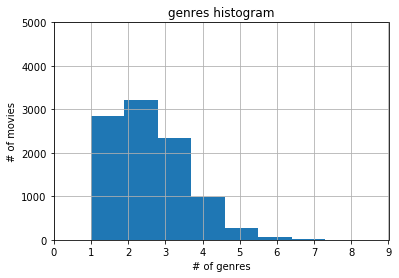

In [7]:
#movies vs no of genres histogram
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(movies_df.genre_count)
plt.title("genres histogram")
plt.xlabel("# of genres")
plt.ylabel("# of movies")
plt.axis([0,9,0,5000])
plt.grid()
plt.show()

In [8]:
# to see how many movies per genre
from collections import Counter
genre_flat = [item for sublist in movies_df.new_genre for item in sublist]
genre_dict = dict(Counter(genre_flat))
print (genre_dict)

{'Adventure': 1263, 'Animation': 611, 'Children': 664, 'Comedy': 3756, 'Fantasy': 779, 'Romance': 1596, 'Drama': 4361, 'Action': 1828, 'Crime': 1199, 'Thriller': 1894, 'Horror': 978, 'Mystery': 573, 'Sci-Fi': 980, 'War': 382, 'Musical': 334, 'Documentary': 440, 'IMAX': 158, 'Western': 167, 'Film-Noir': 87, '(no genres listed)': 34}


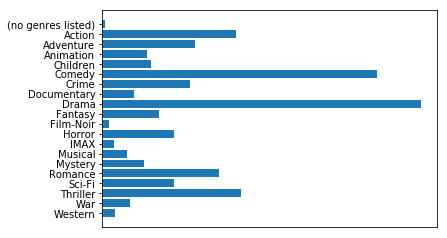

In [10]:
#creating the horizontal bar graph
import collections
import matplotlib.pyplot as plt

od = collections.OrderedDict(sorted(genre_dict.items(), reverse=True))

plt.barh(range(len(od)), od.values(), align='center')
plt.yticks(range(len(od)), od.keys())
plt.gca().axes.get_xaxis().set_ticks([])
plt.show()

In [11]:
ratings_path = "/Users/gauravbhide/Downloads/ratings.csv"
movies_ratings = pd.read_csv(ratings_path)
movies_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [12]:
print, len(movies_ratings.index)
print , len(movies_ratings.userId.unique()) 
print, len(movies_ratings.movieId.unique())

(<function print>, 9724)

In [13]:
print, len(movies_ratings.userId.unique())
print, len(movies_ratings.movieId.unique())
movies_ratings.rating.unique()

array([ 4. ,  5. ,  3. ,  2. ,  1. ,  4.5,  3.5,  2.5,  0.5,  1.5])

In [14]:
import numpy as np

In [15]:
#mean rating
np.mean(movies_ratings.rating)

3.501556983616962

In [17]:
#to find the most common rating given by the users
from scipy import stats
stats.mode(movies_ratings.rating)

ModeResult(mode=array([ 4.]), count=array([26818]))

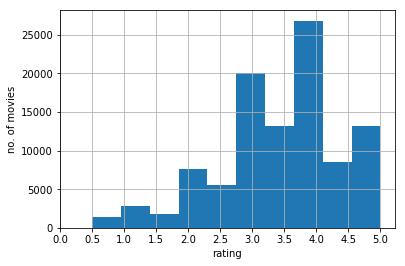

In [18]:
plt.hist(movies_ratings.rating)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.xlabel("rating")
plt.ylabel("no. of movies")
plt.grid()
plt.show()

In [23]:
#to find the highest rated movies
ratings_view = movies_ratings[['movieId', 'rating']]
ratings_view.groupby(['movieId'], as_index=False).mean().sort_values(by='rating', ascending=False).head(10)

,movieId,rating
7638,88448,5.0
8089,100556,5.0
9065,143031,5.0
9076,143511,5.0
9078,143559,5.0
4245,6201,5.0
8136,102217,5.0
8130,102084,5.0
4240,6192,5.0
9104,145994,5.0


In [24]:
#merging the ratings and movies dataset
merged_df = pd.merge(movies_ratings,movies_df, on='movieId')
merged_df.head(5)

,userId,movieId,rating,timestamp,title,genres,new_genre,genre_count
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5


In [25]:
#to get the top listed movies, we have get the titles
title_movie = merged_df[['movieId', 'title',  'rating']]
title_movie.groupby(['movieId', 'title'], as_index=False).mean().sort_values(by='rating',ascending=False).head(10)

,movieId,title,rating
7638,88448,Paper Birds (Pájaros de papel) (2010),5.0
8089,100556,"Act of Killing, The (2012)",5.0
9065,143031,Jump In! (2007),5.0
9076,143511,Human (2015),5.0
9078,143559,L.A. Slasher (2015),5.0
4245,6201,Lady Jane (1986),5.0
8136,102217,Bill Hicks: Revelations (1993),5.0
8130,102084,Justice League: Doom (2012),5.0
4240,6192,Open Hearts (Elsker dig for evigt) (2002),5.0
9104,145994,Formula of Love (1984),5.0


In [26]:
len(merged_df[merged_df['movieId']==88448].index)

1

In [27]:
#let us consider movies with 100+ ratings only
temp_df = title_movie.groupby(['movieId','title'],as_index=False).count()
well_rated_df = temp_df[temp_df['rating'] > 100].sort_values(by= 'rating', ascending=False)
well_rated_df.head()

,movieId,title,rating
314,356,Forrest Gump (1994),329
277,318,"Shawshank Redemption, The (1994)",317
257,296,Pulp Fiction (1994),307
510,593,"Silence of the Lambs, The (1991)",279
1938,2571,"Matrix, The (1999)",278


In [29]:
# now lets created a filtered df from merged_df which only has these movies and then find top 20 movies
filtered_df = merged_df[merged_df['movieId'].apply(lambda x: x in list(well_rated_df['movieId']))]
title_df = filtered_df[['title', 'rating', 'movieId']]
title_df.groupby(['movieId', 'title'], as_index=False).mean().sort_values(by='rating', ascending=False).head(20)

,movieId,title,rating
25,318,"Shawshank Redemption, The (1994)",4.429022
58,858,"Godfather, The (1972)",4.289062
101,2959,Fight Club (1999),4.272936
75,1221,"Godfather: Part II, The (1974)",4.259690
129,48516,"Departed, The (2006)",4.252336
73,1213,Goodfellas (1990),4.250000
130,58559,"Dark Knight, The (2008)",4.238255
8,50,"Usual Suspects, The (1995)",4.237745
67,1197,"Princess Bride, The (1987)",4.232394
20,260,Star Wars: Episode IV - A New Hope (1977),4.231076


In [30]:
# now lets add a column called rating_year which depicts the year when the rating was given
import datetime
year_lambda = lambda x: int(datetime.datetime.fromtimestamp(x).strftime('%Y'))
merged_df['rating_year'] = merged_df['timestamp'].apply(year_lambda)
merged_df.head()

,userId,movieId,rating,timestamp,title,genres,new_genre,genre_count,rating_year
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5,2000
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5,1996
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5,2005
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5,2017
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5,2011


In [31]:
# now lets create a new data frame which contains number of ratings given on each year
ratings_peryear = merged_df.groupby(['rating_year'])['rating_year'].count()
ratings_peryear.head(10)

rating_year
1996     6040
1997     1916
1998      507
1999     2439
2000    10061
2001     3922
2002     3478
2003     4014
2004     3279
2005     5813
Name: rating_year, dtype: int64

In [32]:
# now lets get some stats on number of ratings per year

years = ratings_peryear.keys()
num_ratings = ratings_peryear.get_values()
print , np.mean(num_ratings)

(<function print>, 4384.173913043478)

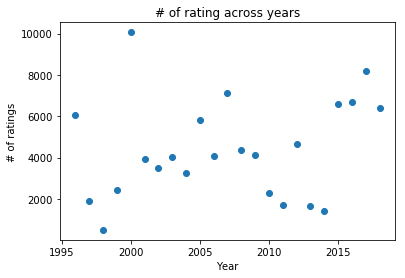

In [33]:
# now lets scatter plot this data to visualize how ratings are spead across years
plt.scatter(years, num_ratings)
plt.title('# of rating across years')
plt.xlabel('Year')
plt.ylabel('# of ratings')
plt.show()

In [35]:
#building a linear regression model using which we will predict how many ratings we get each year
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(years, num_ratings)

In [36]:
#now lets use the slope and intercept to create a predict function which will predict num_ratings given a year
def predict_num_ratings(year):
    return slope * year + intercept

predicted_ratings = predict_num_ratings(years)

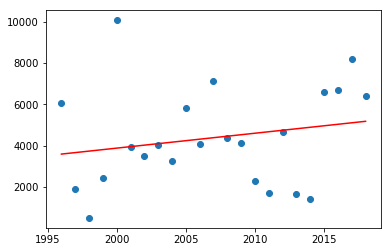

In [37]:
# now lets plot our predicted values along side the actual data to see how well we did
plt.scatter(years, num_ratings)
plt.plot(years, predicted_ratings, c='r')
plt.show()

In [38]:
#now lets see how good our prediction is by calculating the r-squared value
rsquare = r_value ** 2
print (rsquare)

0.0407602463506


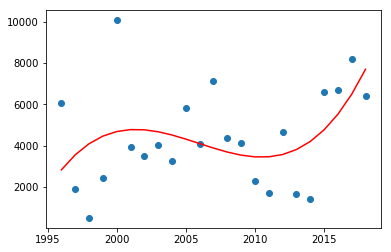

In [39]:
# now lets try a polynomial function instead of a linear function and see if that fits better
polynomial = np.poly1d(np.polyfit(years, num_ratings, 3))
plt.scatter(years, num_ratings)
plt.plot(years, polynomial(years), c='r')
plt.show()

In [40]:
# now lets calculate the r-square for this polynomial regression

from sklearn.metrics import r2_score
r2 = r2_score(num_ratings, polynomial(years))
print (r2)

0.191953224334


In [41]:
# now we can predict how many ratings we expect in any year using our polynomial function
print (polynomial(2017))          
print (polynomial(2018))

6485.80958939
7689.94982147


In this project I have tried to create visualizualization based of the genre and tried to predict how many ratings we can expect in a year. From my analysis i can say that the movies of genre drama and comedy and rated more than the other genres. My model predicts that the number of raings expected this year is about 7890.